# AMERICAN HOUSING SURVEY: HOUSING AFFORDABILITY DATA SYSTEM

## Read in data from .csv

### Method I: Using csv package

In [1]:
import csv

with open('Data/thads2013n_r.txt', 'rt') as fin:
    cin = csv.reader(fin)
    thads2013 = [col for col in cin]

In [2]:
import numpy as np

age=[]
value=[]
header=[] # A list containing all the headers and it's correspinding index start from 0. ex: [1, AGE1]

for k, v in enumerate(thads2013):
    row_sum = k
    
for k, v in enumerate(thads2013[0]):
    col_sum = k

for k in np.arange(row_sum+1):
    if (k > 0) & (thads2013[k][1] != '-9') & (thads2013[k][1] != '0'):
        #print(thads2013[k][1])
        age.append(thads2013[k][1])
        value.append(thads2013[k][14])

for k in np.arange(col_sum+1):
    #print(thads2013[0][k])
    #header.append(thads2013[0][k])
    header.append([k, thads2013[0][k]])

In [3]:
print(row_sum)

10788


### Method II: Using pandas package

In [4]:
import pandas as pd
df = pd.read_csv('Data/thads2013n.txt', header = 0)
df.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,...,'1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,...,'2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,...,'2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,...,'3 GT FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','-5','-5'


### The headers

In [5]:
df.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

## Data preprocessing

### Remove the ' '

In [6]:
type(df['METRO3'][0])

str

In [7]:
for k, v in enumerate(df['METRO3']):
    replaced_value = df['METRO3'][k].replace("'", "")
    df.set_value(k, 'METRO3', replaced_value)

In [8]:
type(df['METRO3'][0])

str

### Convert METRO3 content column to numeric type

In [9]:
df['METRO3'] = pd.to_numeric(df['METRO3'], errors='coerce')

In [10]:
type(df['METRO3'][0])

numpy.int64

### Check if there is any abnormal values of AGE1

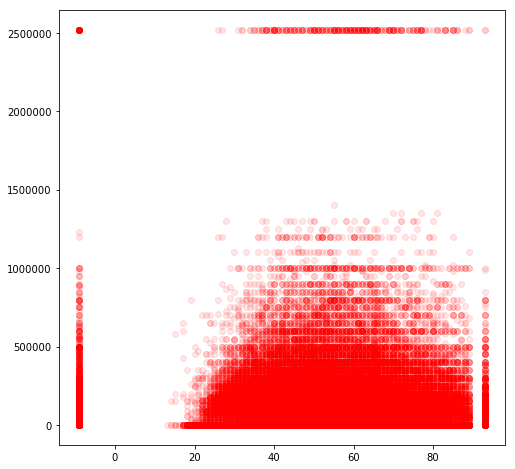

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(df['AGE1'], df['VALUE'], color='r', alpha=0.1)
plt.show()

### Remove all rows with AGE1 < 0 and >= 100, and the rows at other corresponding columns

In [12]:
df['AGE1'] = df[df['AGE1'] >= 0]['AGE1']
df['AGE1'] = df[df['AGE1'] < 90]['AGE1']
df = df[pd.notnull(df['AGE1'])]

### Remove all rows with VALUE >= 2000000, and the rows at other corresponding columns

In [13]:
df['VALUE'] = df[df['VALUE'] < 2000000]['VALUE']
df = df[pd.notnull(df['VALUE'])]

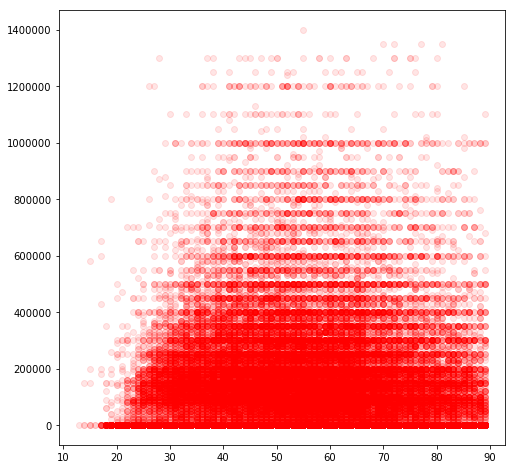

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(df['AGE1'], df['VALUE'], color='r', alpha=0.1)
plt.show()

## Plot scatterplot via Seaborn

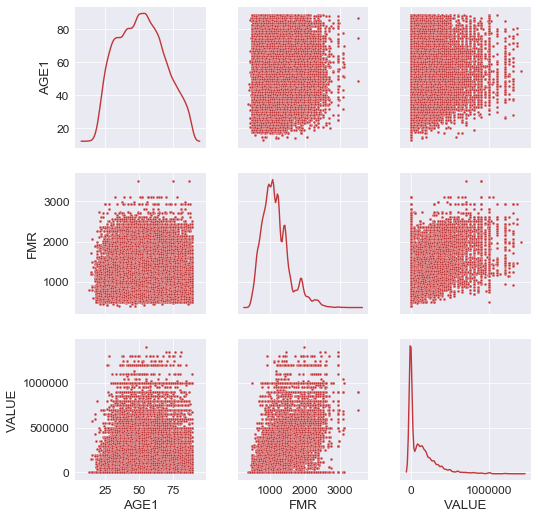

In [31]:
import seaborn as sns
sns.set(style='darkgrid', context='paper', font_scale=1.5, palette="RdBu")
cols = ['AGE1', 'FMR', 'VALUE']
sns.pairplot(df[cols], size=2.5, markers=".", diag_kind='kde')
plt.show()

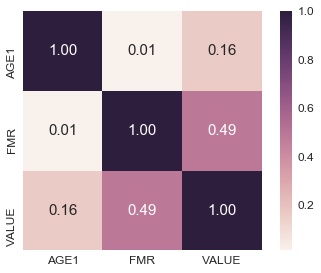

In [33]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()